# Mini-Project 4

Welcome to your fourth Mini Project! You will build an RNN model to classify text and an LSTM model for anomaly detection (also outlier detection) on the temperature sensor data. **Please complete your assignment in this Jupyter Notebook.**

---

**Requirements**: 
- TensorFlow 2.x is allowed to implement your models.
- Your code should follow [PEP 8](https://www.python.org/dev/peps/pep-0008/) with necessary comments.

## Task 1: Text Classification

This task aims to train a sentiment analysis model to classify given sentences as **positive or negative**, based on the Recurrent Neural Network.

---

**Tasks**

1. Load data
    - Load the training data and the test data.
    - Extract labels and texts which are seperated by the string of `" +++$+++ "`.
    - Eliminate index information in the test data so that you can get pure sentences.
    - Print out the first 10 examples of your training set and test set.
2. Preprocess data
    - Tokenize the data and convert the text to sequences.
    - Add padding to ensure that all the sequences have the same shape.
    - **Hint**: click [here](https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html) for more information.
3. Build RNN model
    - Build a RNN based on TensorFlow 2.x.
    - Visualize the model using [tf.keras.utils.plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).
4. Train model
    - Initialize hyperparameters.
    - Train your model.
    - Visualize the performance including training loss, training accuracy, validation loss, and validation accuracy.
5. Predict
    - Test your model on the test data.
    - Save the predicted results (labels and texts) in a CSV file and submit it to Canvas.


In [82]:
import os
from google.colab import drive
drive.mount('/content/drive')
currentpath=os.getcwd()
path_task1_train=currentpath+"/drive/MyDrive/Colab Notebooks/task1_training_data.txt"
path_task1_test=currentpath+"/drive/MyDrive/Colab Notebooks/task1_test_data.txt"
path_task2=currentpath+"/drive/MyDrive/Colab Notebooks/ambient_temperature_system_failure.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Write your code here

import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [84]:
# Write your code here

#1.Load data

train_data=open(path_task1_train,"r")
test_data=open(path_task1_test,"r")
train_text=[]
train_grnd=[]
test_text=[]
Line2=test_data.readline()

for i in range(200000): 
    Line=train_data.readline()
    Line=Line.strip("','\n'")
    train_grnd.append(int(Line.split("+++$+++",1)[0]))
    train_text.append(Line.split("+++$+++",1)[1])
    
x_train=train_text[:180000]
y_train=train_grnd[:180000]

x_test=train_text[180000:200000]
y_test=train_grnd[180000:200000]

print("Training Data")
for i in range(10):
    print("",x_train[i])
print("\n")
print("Testing Data")
for i in range(10):
    print("",x_test[i])
    
  

Training Data
  are wtf ... awww thanks !
  leavingg to wait for kaysie to arrive myspacin itt for now ilmmthek .!
  i wish i could go and see duffy when she comes to mamaia romania .
  i know eep ! i can ' t wait for one more day ....
  so scared and feeling sick . fuck ! hope someone at hr help ... wish it would be wendita or karen .
  my b day was thurs . i wanted 2 do 5 this weekend for my b day but i guess close enough next weekend . going alone
  e3 is in the trending topics only just noticed ive been tweeting on my iphone until now
  where did you get him from i know someone who would love that !
  dam just got buzzed by another huge fly ! this time it landed on my head ... not impressed
  tomorrowwwwwwwww !!! you ' ll love tomorrow ' s news !


Testing Data
  nadal pulled out of wimbledon
  yo , r u work ? at the apple store now . i need ur advice
  fuck you rock band 2 and your fucking up freezepop songs !!
  told u
  has just joined twitter and has no one to follow
  hey type

In [85]:
# 2. Preprocess data

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from itertools import islice

def take(n,iterable):
    return list(islice(iterable,n))

num_words = 700
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

# Tokenize our training data
tokenizer = Tokenizer(num_words=num_words, 
                      oov_token=oov_token,
                      filters='!"#$%&()*+,-./:;<=>[0-9]?@[\\]^_`{|}~\t\n\'',
                      lower=True,
                     )

tokenizer.fit_on_texts(x_train)

# Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(x_train)

# Get max training sequence length
maxlen = max([len(x) for x in train_sequences])

# Pad the training sequences
train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

# Output the results of our work
n_items=take(20,word_index.items())
print("Word index:\n",n_items )
for i in range(3):
    print("\nTraining sequences:\n", train_sequences[i])
    print("\nPadded training sequences:\n", train_padded[i])
print("\nPadded training shape:", train_padded.shape)
print("Training sequences data type:", type(train_sequences))
print("Padded Training sequences data type:", type(train_padded))


Word index:
 [('<UNK>', 1), ('i', 2), ('to', 3), ('the', 4), ('a', 5), ('my', 6), ('it', 7), ('and', 8), ('you', 9), ('is', 10), ('for', 11), ('in', 12), ('s', 13), ('of', 14), ('t', 15), ('that', 16), ('on', 17), ('me', 18), ('so', 19), ('have', 20)]

Training sequences:
 [39, 1, 460, 82]

Padded training sequences:
 [ 39   1 460  82   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]

Training sequences:
 [1, 3, 142, 11, 1, 3, 1, 1, 1, 11, 29, 1]

Padded training sequences:
 [  1   3 142  11   1   3   1   1   1  11  29   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]

Training sequences:
 [2, 116, 2, 144, 41, 8, 67, 1, 86, 109, 1, 3, 1, 1]

Padded training sequences:
 [  2 116   2 144  41   8  67   1  86 109   1   3   1   1   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]

Padded training shape: (180

In [90]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
for i in range(3):
    print("Testing sequences:\n", test_sequences[i])
    print("\nPadded testing sequences:\n", test_padded[i])
print("\nPadded testing shape:",test_padded.shape)

Testing sequences:
 [1, 1, 36, 14, 1]

Padded testing sequences:
 [ 1  1 36 14  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0]
Testing sequences:
 [1, 339, 56, 49, 26, 4, 1, 667, 29, 2, 92, 215, 1]

Padded testing sequences:
 [  1 339  56  49  26   4   1 667  29   2  92 215   1   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]
Testing sequences:
 [507, 9, 608, 1, 58, 8, 44, 635, 33, 1, 633]

Padded testing sequences:
 [507   9 608   1  58   8  44 635  33   1 633   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]

Padded testing shape: (20000, 37)


In [91]:
train_padded.shape

(180000, 37)

In [92]:
test_padded.shape

(20000, 37)

In [89]:
#Visualize data after padding

for x, y in zip(x_test[0:2], test_padded[0:2]):
      print('{} -> {}'.format(x, y))


 nadal pulled out of wimbledon -> [ 1  1 36 14  1]
 yo , r u work ? at the apple store now . i need ur advice -> [  1 339  56  49  26]


In [93]:
#3. Build RNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential()
model.add(layers.Embedding(700,128,input_length=37))
model.add(layers.Dropout(0.2))
model.add(layers.GRU(128,activation="tanh", return_sequences=True,kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.SimpleRNN(64,kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001)))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 37, 128)           89600     
                                                                 
 dropout_36 (Dropout)        (None, 37, 128)           0         
                                                                 
 gru_13 (GRU)                (None, 37, 128)           99072     
                                                                 
 dropout_37 (Dropout)        (None, 37, 128)           0         
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 64)                12352     
                                                                 
 dropout_38 (Dropout)        (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 1)               

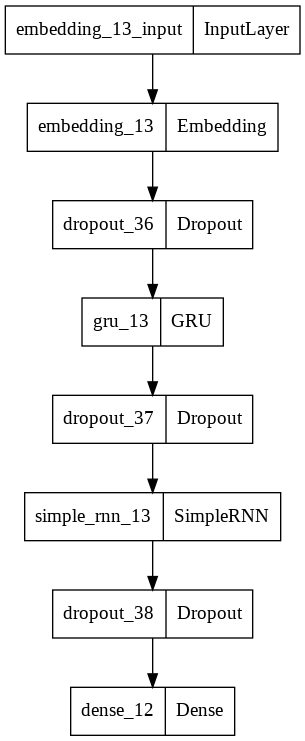

In [94]:
#Visualize model 


tf.keras.utils.plot_model(
    model, to_file='model1.png', show_shapes=False, 
    show_layer_names=True, rankdir='TB')

In [95]:
#4. Train the model
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"],)

train_padded=np.array(train_padded)
test_padded=np.array(test_padded)
y_train=np.array(y_train)
y_test=np.array(y_test)

history = model.fit(train_padded, y_train, validation_data=(test_padded,y_test),batch_size=180, shuffle=True,epochs=20,verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1000/1000 [==============================] - 52s 50ms/step - loss: 0.7466 - accuracy: 0.6926 - val_loss: 0.6369 - val_accuracy: 0.7509
Epoch 2/20
1000/1000 [==============================] - 49s 49ms/step - loss: 0.6276 - accuracy: 0.7439 - val_loss: 0.6021 - val_accuracy: 0.7535
Epoch 3/20
1000/1000 [==============================] - 49s 49ms/step - loss: 0.5993 - accuracy: 0.7483 - val_loss: 0.5832 - val_accuracy: 0.7554
Epoch 4/20
1000/1000 [==============================] - 49s 49ms/step - loss: 0.5772 - accuracy: 0.7521 - val_loss: 0.5684 - val_accuracy: 0.7556
Epoch 5/20
1000/1000 [==============================] - 49s 49ms/step - loss: 0.5631 - accuracy: 0.7531 - val_loss: 0.5570 - val_accuracy: 0.7545
Epoch 6/20
1000/1000 [==============================] - 49s 49ms/step - loss: 0.5498 - accuracy: 0.7557 - val_loss: 0.5454 - val_accuracy: 0.7592
Epoch 7/20
1000/1000 [==============================] - 49s 49ms/step - loss: 0.5378 - accuracy: 0.7588 - val_loss: 0.5349 - val_accura

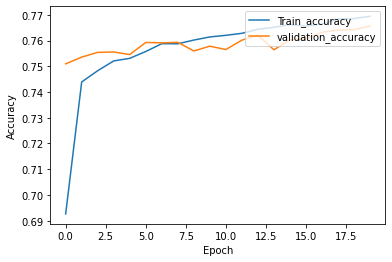

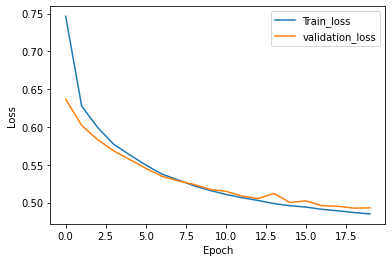

In [96]:
# TODO: visualize the training history including accuracy curves and loss curves of your optimal model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='upper right')
plt.show()

plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')
plt.show()


In [112]:
# Preprocessing of text data
test_data=open(path_task1_test,"r")
Line2=test_data.readline()

test_text=[]
for i in range(200000): 
    Line2=test_data.readline() 
    Line2=Line2.strip("','\n'")
    test_text.append(Line2.split(",",1)[1])
    
test_sequences = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=37)
for i in range(3):
    print("Testing sequences:\n", test_sequences[i])
    print("\nPadded testing sequences:\n", test_padded[i])
print("\nPadded testing shape:",test_padded.shape)


Testing sequences:
 [6, 510, 676, 196, 349, 40, 565, 88, 676, 7]

Padded testing sequences:
 [  6 510 676 196 349  40 565  88 676   7   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]
Testing sequences:
 [226, 95, 34, 1, 236, 14, 1, 1, 208, 62, 1, 25, 1, 36, 14, 150, 1, 4, 1, 14, 1, 61, 1, 537]

Padded testing sequences:
 [226  95  34   1 236  14   1   1 208  62   1  25   1  36  14 150   1   4
   1  14   1  61   1 537   0   0   0   0   0   0   0   0   0   0   0   0
   0]
Testing sequences:
 [397, 621, 71, 96, 19, 397]

Padded testing sequences:
 [397 621  71  96  19 397   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]

Padded testing shape: (200000, 37)


In [113]:
# Predicting the test output
predictions=model.predict(test_padded)


In [118]:
# saving the file

import csv

result=open("Result.csv",'w')
writer=csv.writer(result)
header = ['id', 'Text']
writer.writerow(header)
for x, y in zip(predictions, test_text):
    res=[str(round(x[0])),str(y)]
    writer.writerow(res)
result.close()


'0,omg last day sooon n of primary noooooo x im gona be swimming out of school wif the amount of tears am gona cry\n'

## Task 2: Anomaly Detection

In manufacturing industries, the anomaly detection technique is applied to predict the abnormal activities of machines based on the data read from sensors. In machine learning and data mining, anomaly detection is the task of identifying the rare items, events, or observations that are suspicious and seem different from the majority of the data. In this task, you will predict the possible failure of the system based on the temperature data. And this failure can be detected by check if they follow the trend of the majority of the data.

---

**Dataset**

The given dataset (`ambient_temperature_system_failure.csv`) is a part of Numenta Anomaly Benchmark (NAB) dataset, which is a novel benchmark for evaluating machine learning algorithms in anomaly detection.

**Tasks**

Because the labels have not been given, you will need to use a LSTM based model to capture the trend of the feature for majority of the data. First, extract $n_x$ features from each of the raw data point. Second, create a sliding window with length $l$. Third, fomulate LSTM taking a matrix of shape $l \times n_x$ as the input to predict the temperature value of the next time step $l+1$. Last, compare the predicted result and the real data and find out abnormal points where the difference between these two values are larger than the threshold. 

For instance, if we want to extract 3 features ($n_x=3$), and set the sliding window length to 100 ($l=100$). Then LSTM will take the first 100 (e.g., $[0:100]$) time step data as the input to predict the temperature value of the next time step (e.g., 100). The shape of the input will be $100 \times 3$, and shape of the output will be a single number.

1. Load data
    - Read the CSV file.
    - Draw a curve to visualize the time-series data.
2. Preprocess data
    - The raw data of temperature is the degree Fahrenheit, you will need to convert it into degree Celcius.
    - Use Pandas package convert string timestamp data into the datatime data. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for details.
3. Feature Engineering
    - We will use datatime data to generate four features: hours, day or night, day of the week, weekday or weekends.
    - Hour: convert datetime data into hours. The result of your processed data will be [0, 1, 2, ..., 22, 23, 0, 1, ..., 22, 23]. Check [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html).
    - Day or night: this will be a binary data. 7:00-22:00 will be day time, the rest will be night.
    - Day of the week: convert datetime data into day of the week. The result of your processed data will be [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6 ...]. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html) for more information.
    - Workday or weekend: this will be a binary data. Monday to Friday will be workdays, Saturday and Sunday are weekend.
    
4. Prepare training and testing data
    - Split the dataset into training set and test set.
    - Min-max normalization.
    - Generate sliding window (similar to the last task of HW1) data.
3. Build LSTM model
    - Build an LSTM model using TensorFlow 2.x.
    - Visualize your model.
4. Train model
    - Initialize hyperparameters.
    - Train the model.
    - Evaluate the trained model on the test data.
    - Visualize the performance including training loss and test loss.
5. Find anomalies
    - Specify the threshold and predict anomalies on testing dataset.
    - Visualize the anomalies.


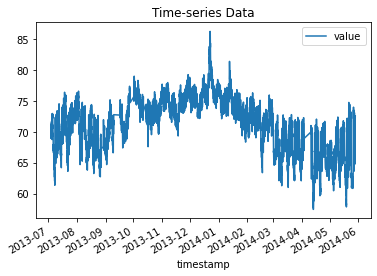

In [220]:
# Write you code here
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# TODO: read dataset
file = pd.read_csv(path_task2,
                   parse_dates=True, 
                   index_col='timestamp')
file.head()
file['value'].plot(legend=True,y='Temperature Values in Farenheit',title='Time-series Data')


In [221]:
# Changing Farenhiet to Degree celsius

file['value'] = round((file['value']-32)*(5/9),5)
file.to_csv('ambient_temperature_system_failure_2.csv')

In [222]:
# Feature Engineering

file= pd.read_csv('ambient_temperature_system_failure_2.csv',
                   parse_dates=True)



file['value']=np.round(file['value'],decimals = 4)
file.to_csv('out.csv',index=False)  

file['timestamp']=pd.to_datetime(file['timestamp'])

datetime_series = pd.Series(file['timestamp'])

# Hour information 
file["hour"]=file['timestamp'].dt.hour

#Day=1 and Night=0 binary data
array=[]
for elements in datetime_series.dt.hour:
    if elements>6 and elements<23:
        array.append(1)
    else:
        array.append(0)

file.insert(3,column="days/night",value=array)

# Adding days of week 

file.insert(4,column="daysofweek",value=datetime_series.dt.dayofweek)


# Adding weekday and weekends information
# datetime_series.dt.weekday outputs -->> Monday=0, Sunday=6.

#  Monday-friday = 1 and saturday and sunday =0
array=[]
for elements in datetime_series.dt.weekday:
    if elements==5 or elements==6:
        array.append(0)
    else:
        array.append(1)
file.insert(4,column="weekend/weekday",value=array)
file.drop('timestamp', inplace=True, axis=1)
file


,value,hour,days/night,weekend/weekday,daysofweek
0,21.0449,0,0,1,3
1,21.7890,1,0,1,3
2,21.5988,2,0,1,3
3,20.5330,3,0,1,3
4,20.7131,4,0,1,3
...,...,...,...,...,...
7262,22.4279,11,1,1,2
7263,22.3183,12,1,1,2
7264,22.2481,13,1,1,2
7265,22.1251,14,1,1,2


In [223]:
# Normalizing using min max method

normalized_data=(file-file.min())/(file.max()-file.min())
labels=list(normalized_data.keys())
labels


['value', 'hour', 'days/night', 'weekend/weekday', 'daysofweek']

In [224]:
#Split training and testing dataset (80:20)

n = len(normalized_data)
training_data= normalized_data[0:int(n*0.8)]
testing_data= normalized_data[int(n*0.8):]
print("Size of train data : ",training_data.shape)
print("Size of test data : ",testing_data.shape)


Size of train data :  (5813, 5)
Size of test data :  (1454, 5)


In [229]:
testing_data

,value,hour,days/night,weekend/weekday,daysofweek
5813,0.303290,0.304348,1.0,1.0,0.666667
5814,0.306119,0.347826,1.0,1.0,0.666667
5815,0.374258,0.391304,1.0,1.0,0.666667
5816,0.406949,0.434783,1.0,1.0,0.666667
5817,0.405040,0.478261,1.0,1.0,0.666667
...,...,...,...,...,...
7262,0.518404,0.478261,1.0,1.0,0.333333
7263,0.511545,0.521739,1.0,1.0,0.333333
7264,0.507153,0.565217,1.0,1.0,0.333333
7265,0.499456,0.608696,1.0,1.0,0.333333


In [244]:
def window_generator(start,end,data):
    window=data.loc[start:end-1,['value','hour', 'days/night', 'weekend/weekday', 'daysofweek']]
    window_label=data.loc[end,['value']]
    return window,window_label

def slice_data(dataset,length_of_window,idx):
    
    tmp_feature=[]
    tmp_label=[]
    end_idx=idx+length_of_window
    for i in range(len(dataset)-100):
        window_feature,window_label=window_generator(idx+i,end_idx+i,dataset)
        tmp_feature.append(np.array(window_feature))
        tmp_label.append(np.array(window_label))
    features=np.array(tmp_feature)
    labels=np.array(tmp_label)
    return features,labels

In [245]:
# Sliding window of size - n=100
# for training data

train,train_label=slice_data(training_data,100,0)
test,test_label=slice_data(testing_data,100,len(training_data))

In [249]:
# Build LSTM Model

model = keras.Sequential()
model.add(layers.LSTM(64,input_shape=(100,5)))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17920     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________


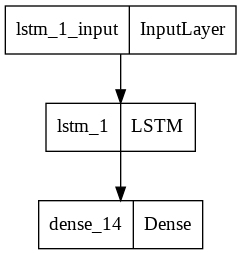

In [176]:
# Visualize the model

tf.keras.utils.plot_model(
    model, to_file='model2.png', show_shapes=False, 
    show_layer_names=True, rankdir='TB')

In [177]:
model.compile (loss=keras.losses.MeanSquaredError(),
               optimizer=keras.optimizers.Adam(),
               metrics=[keras.metrics.MeanAbsoluteError()])

history = model.fit(train,train_label,validation_data=(test,test_label),verbose=2,epochs=10)     
        

Epoch 1/10
179/179 - 6s - loss: 0.0121 - mean_absolute_error: 0.0681 - val_loss: 0.0047 - val_mean_absolute_error: 0.0543 - 6s/epoch - 34ms/step
Epoch 2/10
179/179 - 4s - loss: 0.0015 - mean_absolute_error: 0.0305 - val_loss: 0.0036 - val_mean_absolute_error: 0.0468 - 4s/epoch - 21ms/step
Epoch 3/10
179/179 - 4s - loss: 0.0013 - mean_absolute_error: 0.0282 - val_loss: 0.0030 - val_mean_absolute_error: 0.0427 - 4s/epoch - 21ms/step
Epoch 4/10
179/179 - 4s - loss: 0.0012 - mean_absolute_error: 0.0270 - val_loss: 0.0026 - val_mean_absolute_error: 0.0392 - 4s/epoch - 21ms/step
Epoch 5/10
179/179 - 4s - loss: 0.0011 - mean_absolute_error: 0.0269 - val_loss: 0.0031 - val_mean_absolute_error: 0.0437 - 4s/epoch - 21ms/step
Epoch 6/10
179/179 - 4s - loss: 0.0010 - mean_absolute_error: 0.0257 - val_loss: 0.0022 - val_mean_absolute_error: 0.0364 - 4s/epoch - 21ms/step
Epoch 7/10
179/179 - 4s - loss: 9.7817e-04 - mean_absolute_error: 0.0248 - val_loss: 0.0020 - val_mean_absolute_error: 0.0343 - 4s

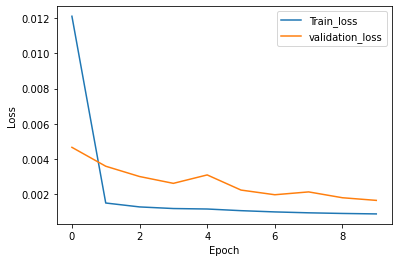

In [178]:
# TODO: visualize the training and testing loss curves of your optimal model
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')
plt.show()


In [181]:
performance=model.evaluate(test,test_label,verbose=0)

In [182]:
performance

[0.001634483109228313, 0.03150421753525734]

In [183]:
predictions=model.predict(test)


In [184]:
predictions

array([[0.39440915],
       [0.3697906 ],
       [0.35650334],
       ...,
       [0.47543198],
       [0.49861625],
       [0.5126831 ]], dtype=float32)

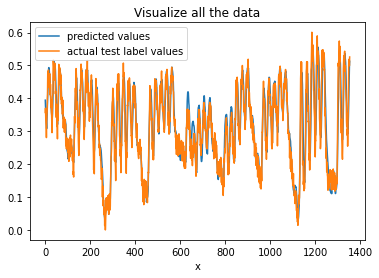

In [250]:
#Plotting the data 
test_label=np.squeeze(test_label)
predictions=np.squeeze(predictions)
plt.plot(predictions, label='predicted values')
plt.plot(test_label,label='actual test label values')
plt.xlabel('x')
plt.title('Visualize all the data')
plt.legend()
plt.show()

In [205]:
Anamoly=test_label-predictions

In [215]:
threshold=max(Anamoly)*.70
threshold

0.09676681300222152

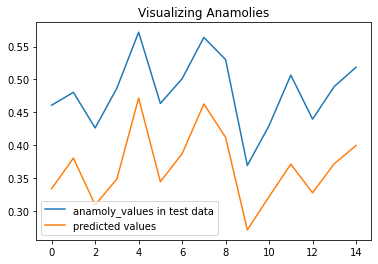

In [217]:
# Visualising the Anamolies from the predicted values

anamoly_values=[]
predicted_value=[]
for i in range(len(Anamoly)):
  if Anamoly[i]>=threshold:
    anamoly_values.append(test_label[i])
    predicted_value.append(predictions[i])

plt.plot(anamoly_values, label='anamoly_values in test data')

plt.plot(predicted_value,label='predicted values')
plt.title('Visualizing Anamolies')
plt.legend()
plt.show()

